In [445]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
import joblib
from joblib import dump

In [446]:
df_data=pd.read_csv("./data/all_tables_combined.csv")

In [447]:
df_data.head(3)

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ


In [448]:
#df_s_parent=df_data[df_data['HH_COMP_DESC']=="1 Adult Kids"]
df_s_parent=df_data

In [449]:
df_s_parent['NUM_DAYS']=df_s_parent['END_DAY'] - df_s_parent['START_DAY'] + 1
df_s_parent.drop(['START_DAY','END_DAY','COUPON_UPC','household_key','PRODUCT_ID'], axis=1, inplace=True)

In [450]:
df_s_parent.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48


In [451]:
#sns.pairplot(df_s_parent)

In [452]:
df_s_parent

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
2,1,1.89,414,0.00,1111,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
3,1,1.67,414,-0.22,1341,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
4,1,1.67,414,-0.22,1243,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112017,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,18,603,...,1 Adult Kids,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,26 OZ,56
112018,2,3.70,402,0.00,1334,0.0,0.0,TypeA,8,438,...,2 Adults No Kids,2,None/Unknown,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ,49
112019,1,5.49,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56
112020,1,5.59,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56


In [453]:
df_s_parent['description'].value_counts()

TypeA    105537
TypeB      5972
TypeC       513
Name: description, dtype: int64

In [454]:
df_s_parent['SUB_COMMODITY_DESC'].value_counts().head(10)

YOGURT NOT MULTI-PACKS            4618
FLUID MILK WHITE ONLY             4314
BANANAS                           3274
FRZN SS PREMIUM ENTREES/DNRS/N    2309
DAIRY CASE 100% PURE JUICE - O    2063
PREMIUM                           1897
PRIMAL                            1636
SHREDDED CHEESE                   1352
REFRIGERATED COFFEE CREAMERS      1305
FRZN BAGGED VEGETABLES - PLAIN    1284
Name: SUB_COMMODITY_DESC, dtype: int64

In [455]:
df_s_parent[df_s_parent['SUB_COMMODITY_DESC'].str.contains('MILK')]['SUB_COMMODITY_DESC'].unique()

array(['FLUID MILK WHITE ONLY', 'INFANT FORMULA MILK BASE', 'BUTTERMILK',
       'CHOCOLATE MILK', 'MISCELLANEOUS MILK', 'FLUID MILK',
       'SOY/RICE MILK'], dtype=object)

In [456]:
df_s_parent=df_s_parent[(df_s_parent['SUB_COMMODITY_DESC']=='FLUID MILK WHITE ONLY') | (df_s_parent['SUB_COMMODITY_DESC']=='MISCELLANEOUS MILK') | (df_s_parent['SUB_COMMODITY_DESC']=='CHOCOLATE MILK')]

In [457]:
df_s_parent.columns.values

array(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN',
       'DAY', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'MANUFACTURER', 'DEPARTMENT', 'BRAND',
       'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'NUM_DAYS'], dtype=object)

In [458]:
df_s_parent.drop(['TRANS_TIME','AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC', 'DEPARTMENT', 'COMMODITY_DESC'], axis=1, inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [459]:
df_s_parent

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
72,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
73,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
74,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
75,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
76,1,1.67,414,-0.82,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111432,1,1.00,292,-0.49,0.0,0.0,TypeA,18,608,531,National,CHOCOLATE MILK,PT,56
111433,1,2.89,292,0.00,0.0,0.0,TypeA,18,608,69,Private,CHOCOLATE MILK,1 GA,56
111435,1,1.00,292,-0.49,0.0,0.0,TypeA,18,608,531,National,MISCELLANEOUS MILK,13.5 OZ,56
111895,1,2.00,368,0.00,0.0,0.0,TypeA,13,506,5423,National,FLUID MILK WHITE ONLY,,48


In [460]:
df_s_parent['CURR_SIZE_OF_PRODUCT'].value_counts()

1 GA        2280
            2053
16 OZ         98
1 QT          90
1 PT          63
1/2 GAL       51
64 OZ         40
32 OZ         19
GAL           17
8 OZ          12
1 GAL         10
PT             8
.5 GAL         6
13.5 OZ        5
1/2GAL         1
6PK/8 OZ       1
QT             1
Name: CURR_SIZE_OF_PRODUCT, dtype: int64

In [461]:
def label_to_volume(label):
    volume=int()
    if label=='1 GA':
        volume=128
    elif label=='1 PT':
        volume=16
    elif label=='16 OZ':
        volume=16
    elif label=='1 QT':
        volume=32
    elif label=='PT':
        volume=16
        
    return volume

vect_label_to_volume=np.vectorize(label_to_volume)

In [462]:
df_s_parent['VOLUME']=vect_label_to_volume(df_s_parent['CURR_SIZE_OF_PRODUCT'])
df_s_parent.head()

<ipython-input-462-8d7fce3a0822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_parent['VOLUME']=vect_label_to_volume(df_s_parent['CURR_SIZE_OF_PRODUCT'])


,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME
72,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
73,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
74,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
75,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
76,1,1.67,414,-0.82,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128


In [463]:
df_s_parent.groupby('CAMPAIGN').sum()

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DAY,MANUFACTURER,NUM_DAYS,VOLUME
CAMPAIGN,,,,,,,,,,
8,4414,7395.21,11526800,-2260.05,-6.09,-1.40,1038395,253625,119119,165888
13,2651,4388.69,5413378,-1344.57,-7.52,-0.45,839104,235690,78096,88576
18,1474,2299.86,917666,-798.35,-4.54,-1.45,419973,71762,39032,42960


In [464]:
df_s_parent=df_s_parent[df_s_parent['SALES_VALUE']<=8]

In [465]:
sales=df_s_parent['SALES_VALUE']

In [466]:
df_s_parent_features=df_s_parent.drop('SALES_VALUE', axis=1)

In [467]:
dummy=pd.get_dummies(df_s_parent_features['BRAND'],drop_first=True)
dummy_milk_type=pd.get_dummies(df_s_parent_features['SUB_COMMODITY_DESC'],drop_first=True)
#dummy_hh_size_desc=pd.get_dummies(df_s_parent_features['HOUSEHOLD_SIZE_DESC'],drop_first=True)
dummy_manufacturer=pd.get_dummies(df_s_parent_features['MANUFACTURER'],drop_first=True)
df_s_parent_features=pd.concat([df_s_parent_features,dummy], axis=1)
df_s_parent_features=pd.concat([df_s_parent_features,dummy_milk_type], axis=1)
#df_s_parent_features=pd.concat([df_s_parent_features,dummy_hh_size_desc], axis=1)
df_s_parent_features=pd.concat([df_s_parent_features,dummy_manufacturer], axis=1)
df_s_parent_features.columns

Index([             'QUANTITY',              'STORE_ID',
                 'RETAIL_DISC',           'COUPON_DISC',
           'COUPON_MATCH_DISC',           'description',
                    'CAMPAIGN',                   'DAY',
                'MANUFACTURER',                 'BRAND',
          'SUB_COMMODITY_DESC',  'CURR_SIZE_OF_PRODUCT',
                    'NUM_DAYS',                'VOLUME',
                     'Private', 'FLUID MILK WHITE ONLY',
          'MISCELLANEOUS MILK',                     531,
                           709,                     865,
                           926,                     927,
                          1078,                    1453,
                          1487,                    1543,
                          5423],
      dtype='object')

In [468]:
df_s_parent_features.drop(['STORE_ID','QUANTITY','BRAND','description','MANUFACTURER','CURR_SIZE_OF_PRODUCT','SUB_COMMODITY_DESC', 'CAMPAIGN', 'NUM_DAYS'], axis=1, inplace=True)

<AxesSubplot:>

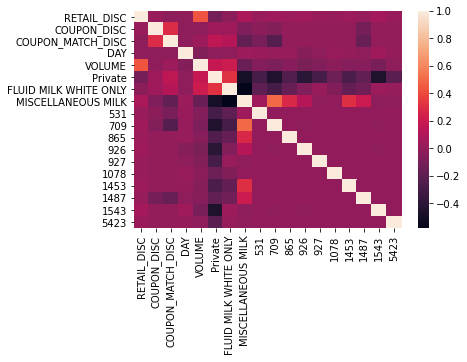

In [469]:
sns.heatmap(df_s_parent_features.corr())

In [470]:
df_s_parent_features.columns.values

array(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'DAY', 'VOLUME',
       'Private', 'FLUID MILK WHITE ONLY', 'MISCELLANEOUS MILK', 531, 709,
       865, 926, 927, 1078, 1453, 1487, 1543, 5423], dtype=object)

In [471]:
X=df_s_parent_features
y=sales

In [472]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 22)

In [473]:
sscaler=StandardScaler()

In [474]:
X_train_scaled=sscaler.fit_transform(X_train)
dump(sscaler,'scaler_file.save')

X_test_scaled=sscaler.fit_transform(X_test)

In [475]:
lasso=Lasso(alpha=0.00001,max_iter=99999)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=1e-05, max_iter=99999)

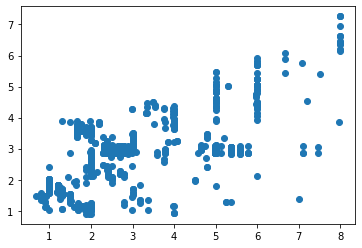

In [476]:
y_preds=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_preds)

/home/user-1711/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_VALUE'>

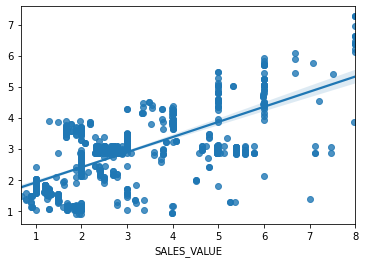

In [477]:
sns.regplot(y_test,y_preds)

In [478]:
features_and_coefs=pd.DataFrame({'features':X.columns, 'coefs':lasso.coef_}).sort_values(by='coefs', ascending=False)
features_and_coefs.features.values

array(['VOLUME', 1543, 'MISCELLANEOUS MILK', 926, 927, 1078, 'DAY', 5423,
       'FLUID MILK WHITE ONLY', 1487, 'COUPON_MATCH_DISC', 709,
       'COUPON_DISC', 1453, 531, 'Private', 865, 'RETAIL_DISC'],
      dtype=object)

In [479]:
X_test_scaled[0]

array([-0.00927262,  0.05802566,  0.05726216, -0.93306465,  1.02181264,
        0.20080483,  0.31532811, -0.1839509 , -0.06576671, -0.07788362,
       -0.04154065, -0.09320996, -0.04154065,  0.        , -0.04154065,
       -0.04154065, -0.10219523, -0.05089866])

In [480]:
cross_val_score(lasso, X_train_scaled,y_train)

array([0.48335912, 0.49968012, 0.47314504, 0.51290511, 0.45122714])

In [481]:
cross_val_score(lasso, X_test_scaled,y_test)

array([0.54052384, 0.52403228, 0.55475358, 0.44124059, 0.3566875 ])

Next let's take the columns whose coefficients have a magnitude over 0.01. We'll try to estimate using ridge instead of lasso and see hot it performs.

NB: REMOVE THE UNECESSARY COLUMNS FROM THE FEATURE MATRIX. NOT DONE YET.

In [482]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [483]:
y_ridge_preds=ridge.predict(X_test_scaled)

In [484]:
cross_val_score(ridge, X_test_scaled,y_test)

array([0.55928865, 0.52393542, 0.55468027, 0.44162744, 0.35685181])

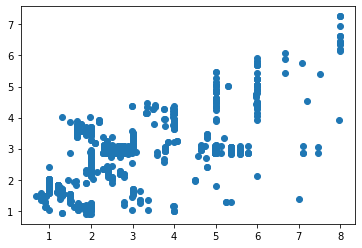

In [485]:
plt.scatter(y_test,y_ridge_preds)

In [486]:
dump(lasso, 'spf_model.joblib')

['spf_model.joblib']